**Data Overview & Preprocessing**
**Dataset:** Toyota Stock Data

**Source:** Investing.com

**Date Range:** January 2, 2020 – February 4, 2025

**Features Used:**

*   Price: Closing stock price
*   Open, High, Low: Daily price fluctuations
*   Vol.: Trading volume (converted from K/M to numerical values)
*   Change %: Percentage change in price (converted to float)

**Data Preprocessing Steps:**

*   Converted 'Date' to datetime format
*   Cleaned 'Vol.' and 'Change %' columns
*   Ensured no missing values
*   Created lag features for forecastin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv("cleanedToyota.csv")

# **Basic Info**

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
print(df.info())
print("Basic Statistics")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1280 non-null   object 
 1   Price     1280 non-null   float64
 2   Open      1280 non-null   float64
 3   High      1280 non-null   float64
 4   Low       1280 non-null   float64
 5   Vol.      1280 non-null   float64
 6   Change %  1280 non-null   float64
dtypes: float64(6), object(1)
memory usage: 70.1+ KB
None
Basic Statistics
             Price         Open         High          Low          Vol.  \
count  1280.000000  1280.000000  1280.000000  1280.000000  1.280000e+03   
mean    164.718781   164.770398   165.696906   163.710172  2.764688e+05   
std      28.664588    28.634940    28.739925    28.513302  1.359098e+05   
min     108.500000   110.000000   112.510000   108.010000  5.991000e+04   
25%     140.520000   140.537500   141.412500   140.027500  1.892025e+05   
50%     162.785000

# **Exploratory Data Analysis (EDA)**

### **Stock Price Trends**

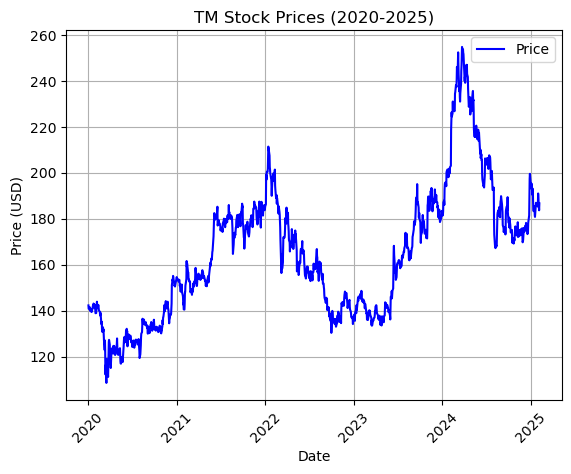

In [ ]:
x = pd.to_datetime(df["Date"])  # Convert to datetime
y = df['Price']
plt.plot(x, y, color='b', label='Price')


plt.grid()
# Format x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set major ticks to appear at the start of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("TM Stock Prices (2020-2025)")
# Show legend
plt.legend()

# Display the graph
plt.show()

### **Seasonal Decompositon**

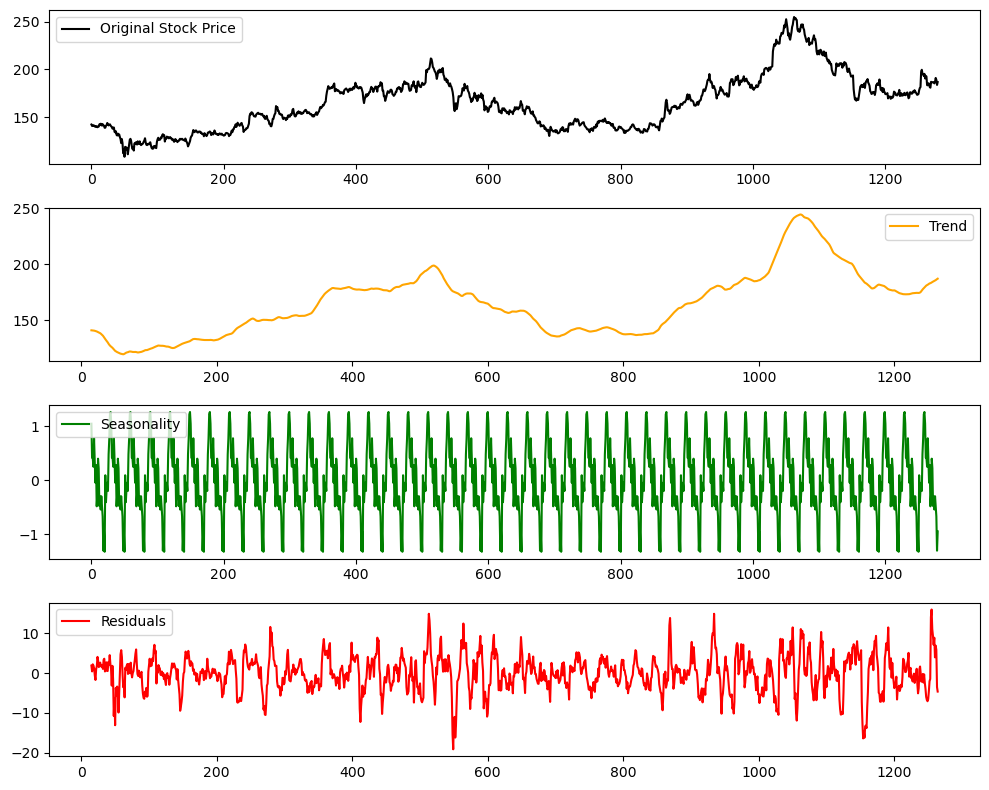

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df["Price"], model='additive', period=30)

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df.index, df["Price"], label="Original Stock Price", color="black")
plt.legend()
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label="Trend", color='orange')
plt.legend()
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label="Seasonality", color='green')
plt.legend()
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label="Residuals", color='red')
plt.legend()
plt.tight_layout()
plt.show()

### **Moving Average**

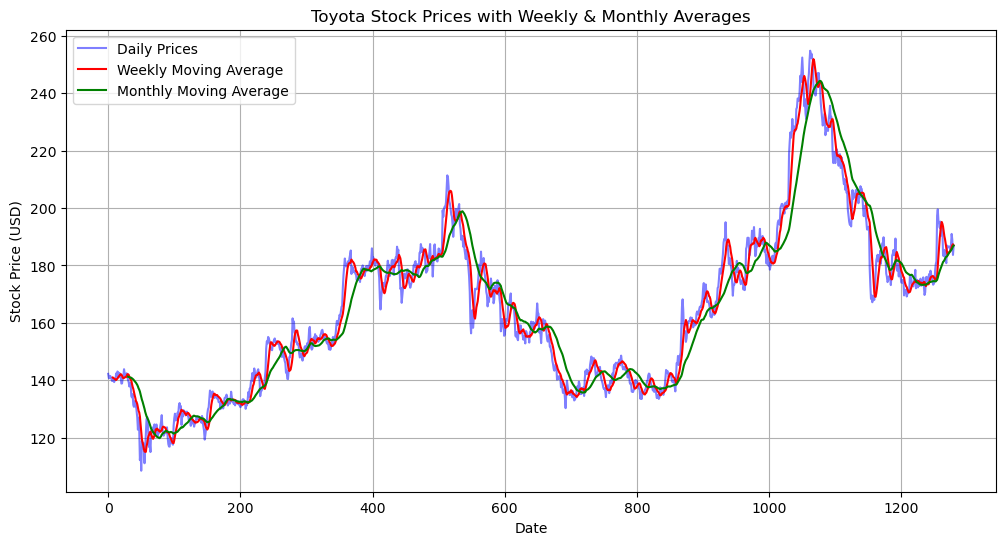

In [ ]:
df["Weekly Avg"] = df["Price"].rolling(window=7).mean().shift(1)
df["Monthly Avg"] = df["Price"].rolling(window=30).mean().shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Daily Prices", alpha=0.5, color="blue")
plt.plot(df.index, df["Weekly Avg"], label="Weekly Moving Average", color="red")
plt.plot(df.index, df["Monthly Avg"], label="Monthly Moving Average", color="green")
plt.title("Toyota Stock Prices with Weekly & Monthly Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

### **Price Distribution**

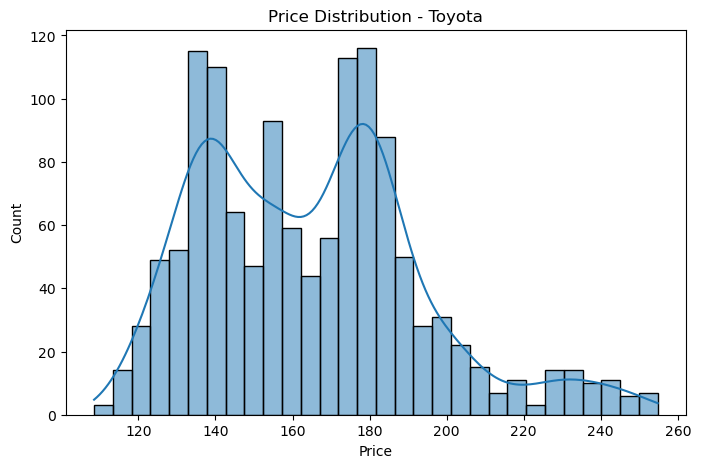

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution - Toyota")
plt.show()


### **Daily High**

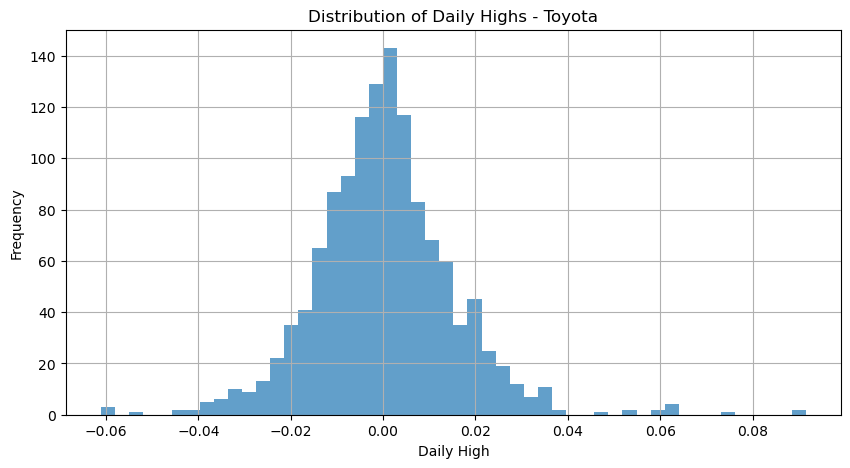

In [ ]:
df['Daily High'] = df['High'].pct_change().shift(1)

#Histogram
df['Daily High'].hist(bins=50, alpha=0.7, figsize=(10, 5))
plt.title("Distribution of Daily Highs - Toyota")
plt.xlabel("Daily High")
plt.ylabel("Frequency")
plt.show()

### **Volume**

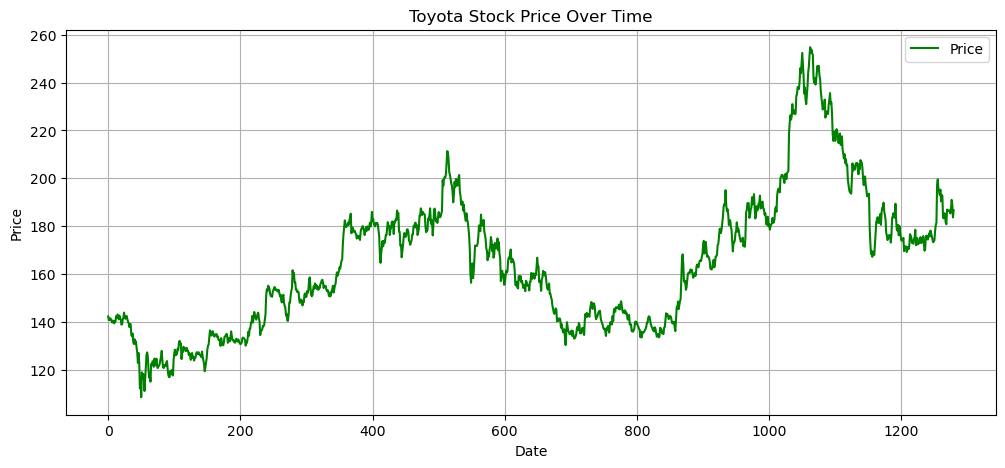

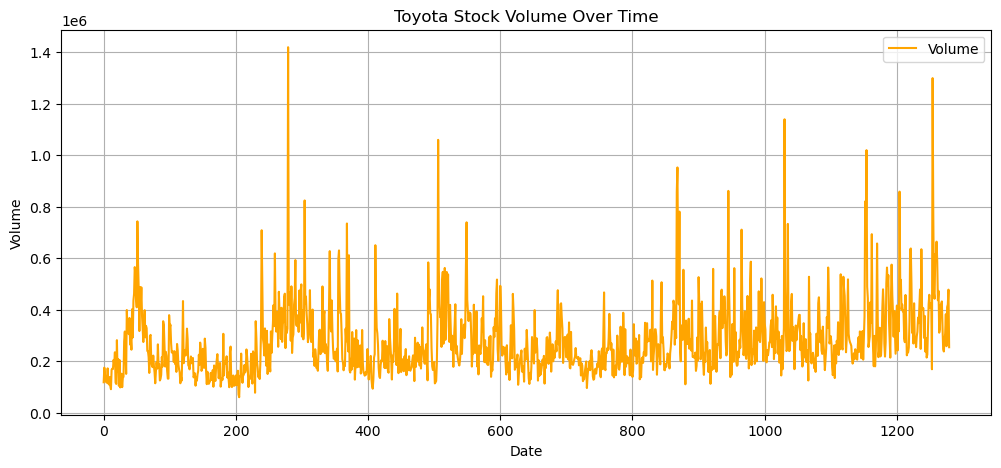

In [ ]:
# Plot stock price over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Price"], label="Price", color="green")
plt.title("Toyota Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot volume over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Vol."], label="Volume", color="orange")
plt.title("Toyota Stock Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#train = df[df.index < '2024-01-01']
#test = df[df.index >= '2024-01-01']

#scaler = StandardScaler()
#train_scaled = scaler.fit_transform(train[['Price', 'Open', 'High', 'Low']])
#test_scaled = scaler.transform(test[['Price', 'Open', 'High', 'Low']])

#pca = PCA(n_components=2)
#pca.fit(train_scaled)

#explained_variance = pca.explained_variance_ratio_
#print("Explained Variance Ratio from PCA:", explained_variance)

Missing Values Per Column:
Date            0
Price           0
Open            0
High            0
Low             0
Vol.            0
Change %        0
Weekly Avg      7
Monthly Avg    30
Daily High      2
dtype: int64


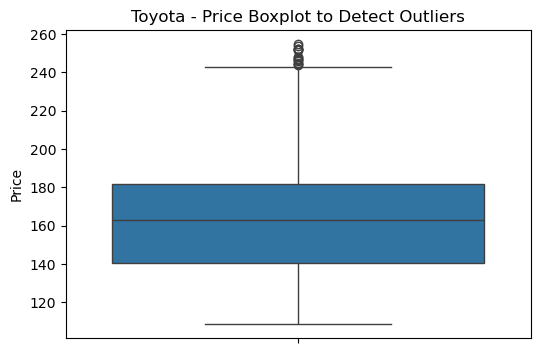

In [ ]:
# Check for missing values
print("Missing Values Per Column:")
print(df.isnull().sum())
# Create a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Price'])
plt.title("Toyota - Price Boxplot to Detect Outliers")
plt.show()

### **Trend Analysis**

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekly Avg,Monthly Avg,Daily High
0,2020-01-02,142.24,142.00,142.35,141.53,118090.0,1.21,NaN,NaN,NaN
1,2020-01-03,140.75,141.23,141.42,140.30,174890.0,-1.05,NaN,NaN,NaN
2,2020-01-06,140.77,139.46,140.89,139.46,150390.0,0.01,NaN,NaN,-0.006533
3,2020-01-07,141.51,142.13,142.43,141.36,123670.0,0.53,NaN,NaN,-0.003748
4,2020-01-08,141.16,140.91,141.58,140.60,117710.0,-0.25,NaN,NaN,0.010931


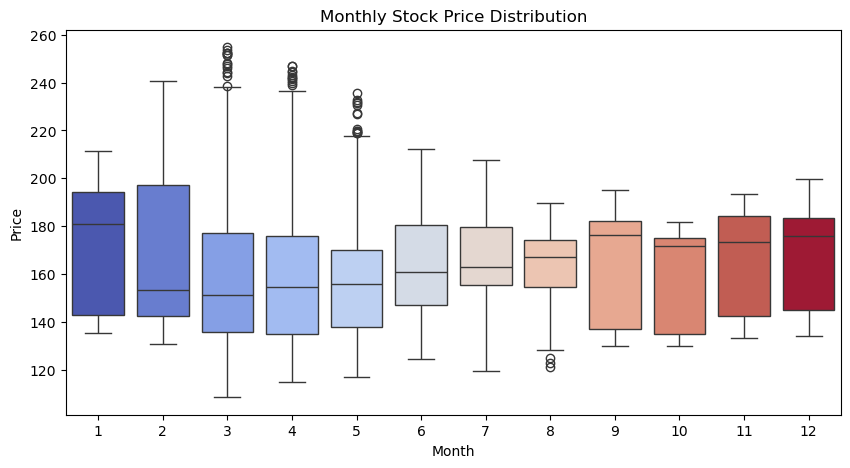

In [ ]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x="Month", y="Price", data=df, palette="coolwarm", hue = "Month", legend = False)
plt.title("Monthly Stock Price Distribution")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()


### **Correlation Matrix**

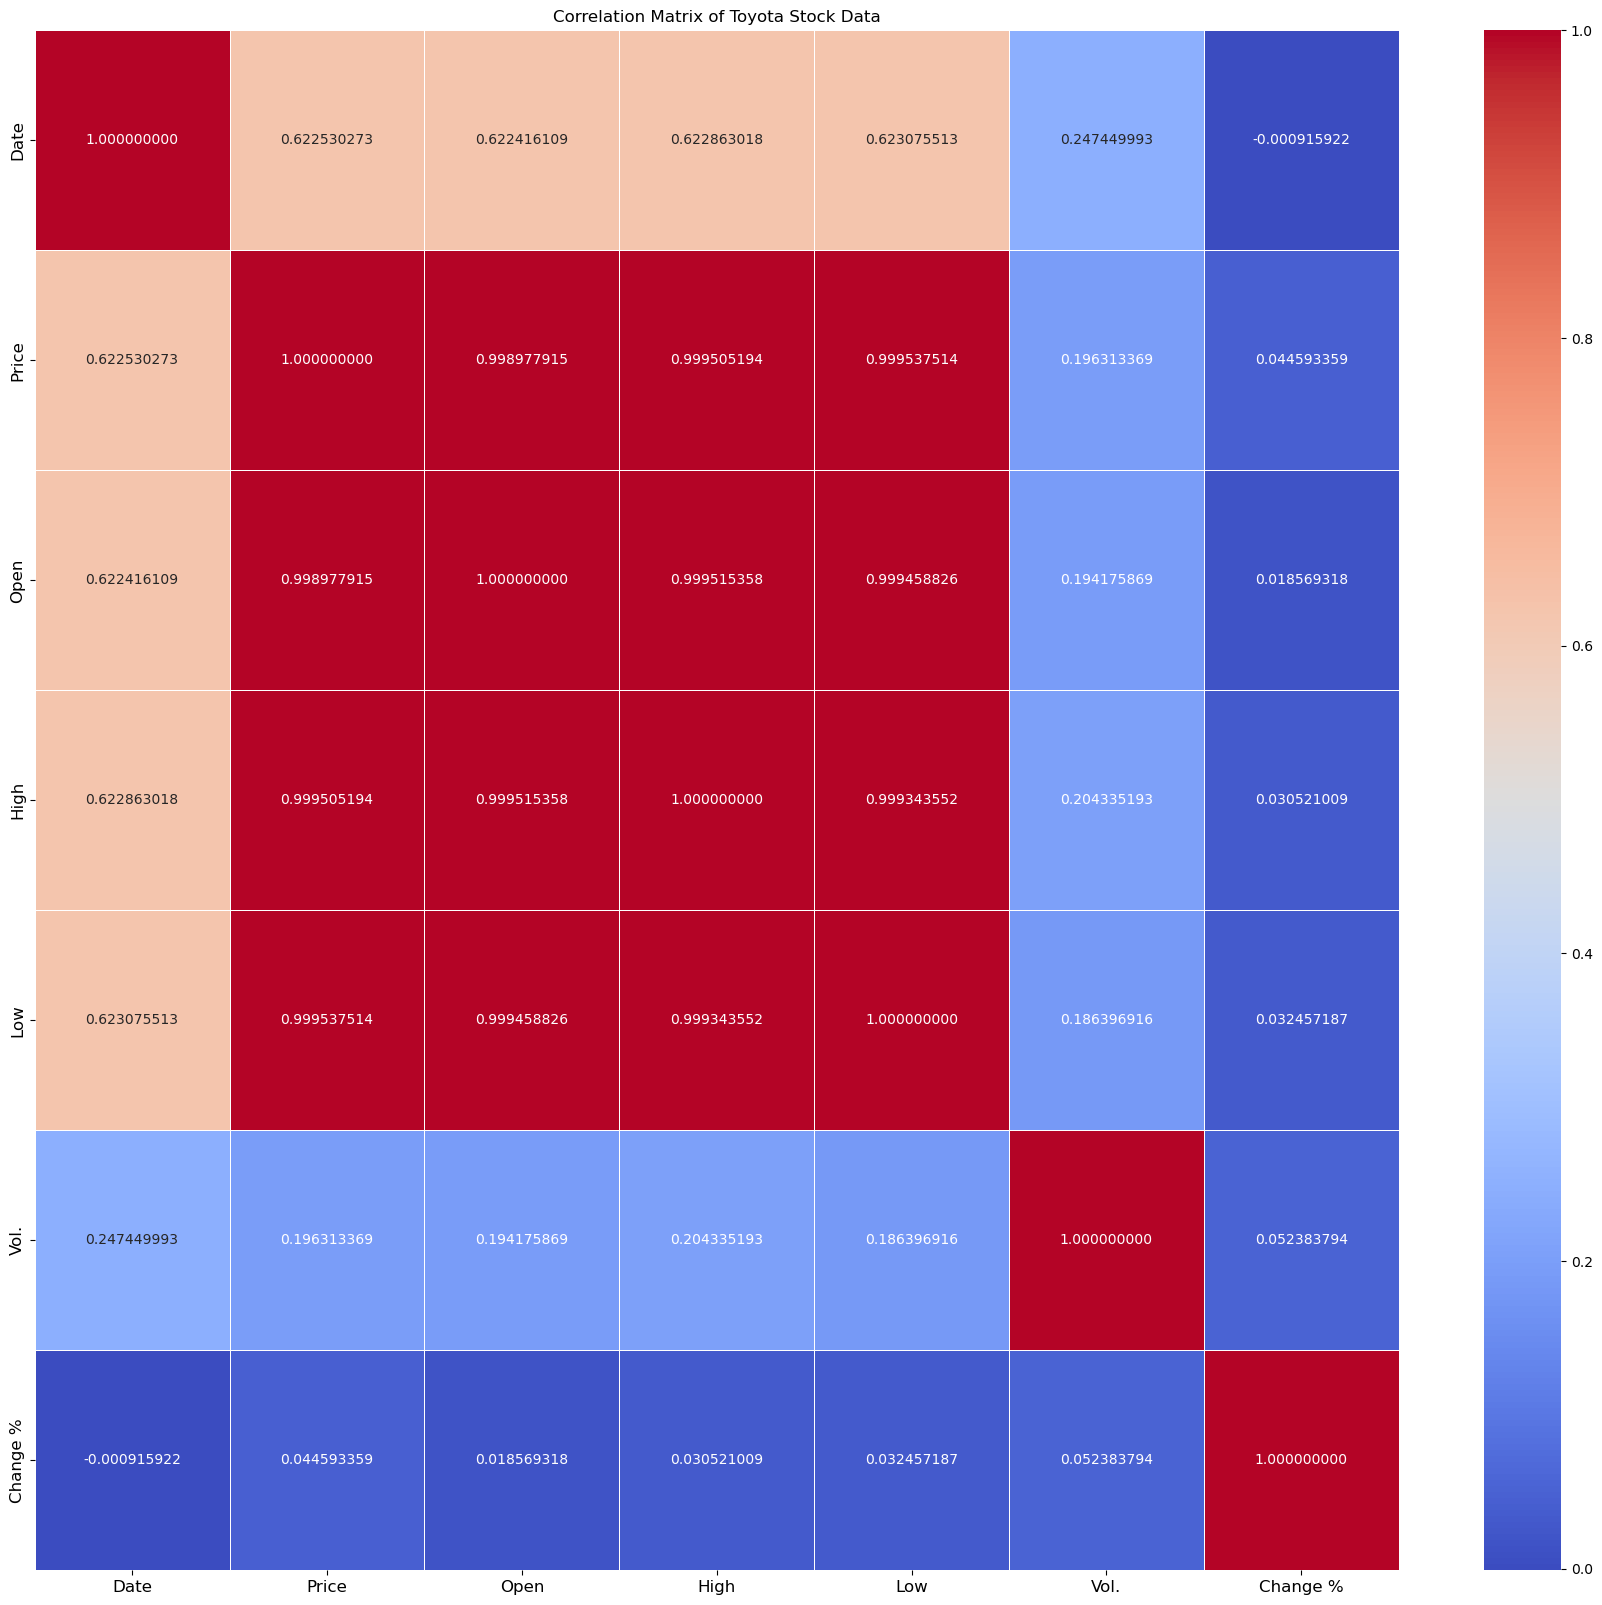

In [ ]:

df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(["Daily High", "Month", "Monthly Avg", "Weekly Avg"], axis=1)
# Correlation heatmap
plt.figure(figsize=(22,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".9f", linewidths=0.5)
plt.title("Correlation Matrix of Toyota Stock Data")
plt.show()

